# TensorBoard

<img src="https://scontent-yyz1-1.cdninstagram.com/v/t51.2885-15/sh0.08/e35/c29.0.1065.1065a/s640x640/90304985_814305105717919_8193839176674701176_n.jpg?_nc_ht=scontent-yyz1-1.cdninstagram.com&_nc_cat=107&_nc_ohc=jWuxlaCraYUAX8STqcR&oh=655afe7582237e3880fcf599f16c2c64&oe=5EA44155" width=500></img>

Let's install some dependencies...

In [0]:
!wget -O utils.py https://drive.google.com/uc?id=1O3QWBKrqA7s8nIGzhKMIz-YNK1-jzwml
!pip install einops

--2020-04-23 07:07:24--  https://drive.google.com/uc?id=1O3QWBKrqA7s8nIGzhKMIz-YNK1-jzwml
Resolving drive.google.com (drive.google.com)... 108.177.126.113, 108.177.126.102, 108.177.126.101, ...
Connecting to drive.google.com (drive.google.com)|108.177.126.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0g-6g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/e7nsdul2no1hn2ejbenqvtgiltrjapap/1587625575000/11513719840956837432/*/1O3QWBKrqA7s8nIGzhKMIz-YNK1-jzwml [following]
--2020-04-23 07:07:25--  https://doc-0g-6g-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/e7nsdul2no1hn2ejbenqvtgiltrjapap/1587625575000/11513719840956837432/*/1O3QWBKrqA7s8nIGzhKMIz-YNK1-jzwml
Resolving doc-0g-6g-docs.googleusercontent.com (doc-0g-6g-docs.googleusercontent.com)... 74.125.143.132, 2a00:1450:4013:c03::84
Connecting to doc-0g-6g-docs.googleusercontent.com (doc-0g-6g-docs.googleusercontent.com)|74

Launching TensorBoard:

In [0]:
%load_ext tensorboard

In [0]:
import os
%load_ext tensorboard
logs_base_dir = "./logs"
os.makedirs(logs_base_dir, exist_ok=True)
%tensorboard --logdir {logs_base_dir}

TB should update its content each 30 seconds. If TensorBoard does not show your new networks for at least a minute, clear output and run the cell again. **Not recommended to press update (circled arrow) too often** -- in Colab it might break your TB for some reason. 

NB: If you have a computer with dedicated GPU and no need to run in Colab (or a server which you can ssh to, e.g. AWS), using TensorBoard will be a much smoother and responsible experience!

# CIFAR10 dataset
In this seminar we'll focus on the image recognition problem on CIFAR10 dataset:
* 60000 32x32 RGB images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.
* 10 different classes: ('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [0]:
from datetime import datetime
import torchvision
import torch
from torchvision import transforms

<img src="https://miro.medium.com/max/1000/1*MUOrB2-H5qkJop3Kl2oYmQ.png" width=600> <img src="https://scontent-frt3-2.xx.fbcdn.net/v/t1.0-9/26168447_1615780241794744_3983133794667786526_n.jpg?_nc_cat=101&_nc_sid=730e14&_nc_oc=AQluugTtzF7jeCdL87DgnMmIB-jU2Buj7qplauJ587ncKP5hOIYCJrdEyVdpSd-cHOo&_nc_ht=scontent-frt3-2.xx&oh=eddfa7dbe4a74c44178bac4df27357e1&oe=5EC21664" width=500>

<sub>Picture credits: [link](https://mc.ai/image-data-augmentation-image-processing-in-tensorflow-part-2/) </sub>

In [0]:
my_transform = {
    'train': transforms.Compose(
        [
            transforms.RandomCrop(32, padding=4),
            transforms.RandomHorizontalFlip(),
            transforms.RandomRotation(30),
            transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.05, hue=0.05),
            transforms.ToTensor(),
#             transforms.Normalize(mean=[0.485, 0.456, 0.406],
#                                  std=[0.229, 0.224, 0.225])
        ]),
    'test': transforms.Compose(
        [
            transforms.ToTensor(),
#               transforms.Normalize(mean=[0.485, 0.456, 0.406],
#                                    std=[0.229, 0.224, 0.225])
        ])
}

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, 
                                             transform=my_transform['train'])
val_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, 
                                           transform=my_transform['test'])

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
class_names = ('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

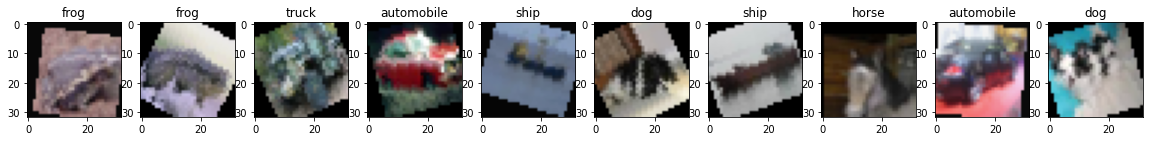

In [0]:
n_pics_to_show = 10
fig, ax = plt.subplots(1, n_pics_to_show, figsize=(20, 10))

for i in range(n_pics_to_show):
    rand_idx = np.random.randint(len(train_dataset))
    pic, label = train_dataset[rand_idx]
    
    pic_np = pic.data.numpy()
    pic_np = np.rollaxis(pic_np, 0, 3)    # 3xHxW to HxWx3
    ax[i].imshow(pic_np)
    ax[i].set_title(class_names[label])

In [0]:
len(train_dataset)

50000

In [0]:
batch_size = 150  # number of samples processed in one iteration
train_batch_gen = torch.utils.data.DataLoader(train_dataset, 
                                              batch_size=batch_size,
                                              shuffle=True,
                                              num_workers=4)

batch_size_val = 50
val_batch_gen = torch.utils.data.DataLoader(val_dataset, 
                                            batch_size=batch_size,
                                            shuffle=False,
                                            num_workers=1)

# Building a network

In [0]:
import numpy as np
import torch, torch.nn as nn
import torch.nn.functional as F

import utils
from utils import compute_loss, compute_accuracy, plot_loss_and_accuracy, \
    plot_classes_preds

# a special module reshapes tensor from [batch, channel, w, h] to [batch, units]
class Flatten(nn.Module):
    def forward(self, input):
        return input.view(input.size(0), -1)

In [0]:
def make_model():
    model = nn.Sequential(
        nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1),
        nn.BatchNorm2d(64),
        nn.ReLU(),
        nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
        nn.BatchNorm2d(128),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2),
        nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
        nn.BatchNorm2d(256),
        nn.ReLU(),
        nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
        nn.BatchNorm2d(256),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2),
        nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
        nn.BatchNorm2d(256),
        nn.ReLU(),
        nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
        nn.BatchNorm2d(256),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2),
        nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
        nn.BatchNorm2d(256),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2),
        Flatten(),
        nn.Linear(256 * (32 // 16) ** 2, 200),
        nn.BatchNorm1d(200),
        nn.Linear(200, 200),
        nn.LogSoftmax(dim=1)
    )
    return model


To use TensorBoard, you need to know only these few lines of code:

* **`from torch.utils.tensorboard import SummaryWriter`**
* **`writer = SummaryWriter('logs/my_experiment')`** where `my_experiment` is a name of your network, as will be shown in TB
* **`writer.add_scalar('train accuracy', my_accuracy, epoch_number)`**

In [0]:
import time
from tqdm import tqdm
from torch.utils.tensorboard import SummaryWriter
from torchvision.utils import make_grid

device = 'cuda:0'


def train(model, num_epochs=50, lr=0.01, exp_name='my_network'):
    writer = SummaryWriter(f'logs/{exp_name}')
    opt = torch.optim.Adam(model.parameters(), lr=lr)

    train_loss = []
    train_accuracy = []
    val_accuracy = []

    for epoch in range(num_epochs):
        start_time = time.time()
        model.train(True) # enable dropout / batch_norm training behavior

        train_accuracy_batch = []

        for batch_no, (X_batch, y_batch) in tqdm(enumerate(train_batch_gen), 
                                                 total=len(train_batch_gen)):
            model.zero_grad()
            X_batch_gpu = X_batch.to(device)
            logits = model(X_batch_gpu)
            loss = compute_loss(logits, y_batch, device=device)
            loss.backward()
            opt.step()

            if batch_no % 10 == 0:
                train_loss.append(loss.item())
                accuracy = compute_accuracy(logits, y_batch, device=device)
                train_accuracy_batch.append(accuracy.item())
                
                plot_loss_and_accuracy(train_loss, train_accuracy, val_accuracy, clear_output=True)
                print(f'epoch {epoch} training stage...')
                
                # SENDING LOSS TO TENSORBOARD
                writer.add_scalar('train loss', loss.item(), global_step=len(train_loss))

                if batch_no % 100 == 0:
                    # SENDING PICTURES TO TENSORBOARD
                    writer.add_image('train samples', make_grid(X_batch[:8], nrow=2), global_step=len(train_loss))
            if batch_no == 0:
                # SENDING NETWORK GRAPH TO TENSORBOARD
                writer.add_graph(model, X_batch_gpu[:8])

        train_accuracy_overall = np.mean(train_accuracy_batch) * 100
        train_accuracy.append(train_accuracy_overall.item())

        # SENDING ACCURACY TO TENSORBOARD
        writer.add_scalar('train accuracy', train_accuracy_overall.item(), epoch + 1)

        print(f'epoch {epoch} testing stage...')
        model.train(False) # disable dropout / use averages for batch_norm
        val_accuracy_batch = []
        for X_batch, y_batch in tqdm(val_batch_gen):
            X_batch_gpu = X_batch.to(device)
            logits = model(X_batch_gpu)

            accuracy = compute_accuracy(logits, y_batch, device=device)
            val_accuracy_batch.append(accuracy.item())
            
        # SENDING PICTURES TO TENSORBOARD
        writer.add_figure('predictions vs. actuals',
                          plot_classes_preds(model, X_batch_gpu, y_batch),
                          global_step=epoch)

        val_accuracy_overall = np.mean(val_accuracy_batch) * 100
        val_accuracy.append(val_accuracy_overall.item())

        # SENDING ACCURACY TO TENSORBOARD
        writer.add_scalar('val accuracy', val_accuracy_overall.item(), epoch + 1)

When using TB, don't forget to set new experiment names each time.

Hint: you can use date and time of network launch.

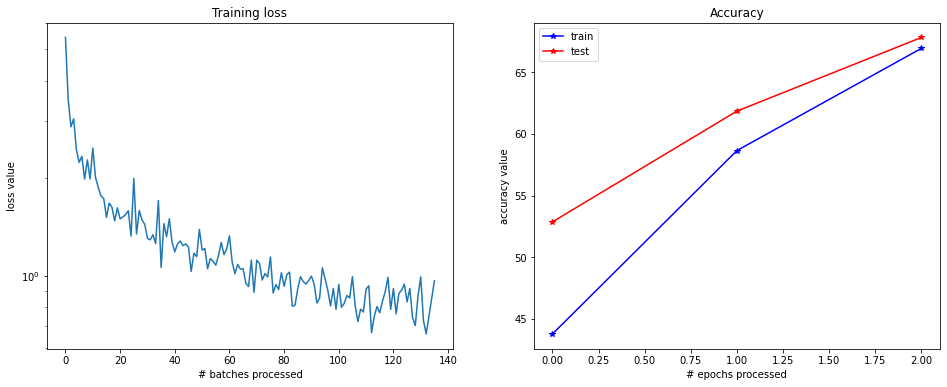

  0%|          | 0/67 [00:00<?, ?it/s]

epoch 3 training stage...
epoch 3 testing stage...


100%|██████████| 67/67 [00:01<00:00, 41.19it/s]


In [0]:
model = make_model()
model = model.to(device)    # transferring model to GPU

lr = 0.001
exp_name = datetime.now().isoformat(timespec='seconds') + f'vgglike_data_augm_{lr}'
train(model, num_epochs=4, lr=lr, exp_name=exp_name)
# to stop it press Ctrl+M, then I in Colab -- works better than "stop" button

Let's try higher learning rate and see how TensorBoard handles the 2nd net:

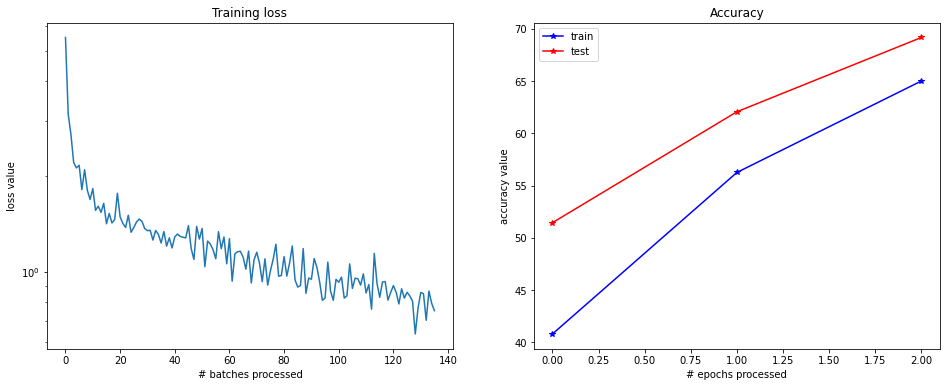

  0%|          | 0/67 [00:00<?, ?it/s]

epoch 3 training stage...
epoch 3 testing stage...


100%|██████████| 67/67 [00:01<00:00, 40.92it/s]


In [0]:
model = make_model()
model = model.to(device)    # transferring model to GPU

lr = 0.005
exp_name = datetime.now().isoformat(timespec='seconds') + f'vgglike_data_augm_{lr}'
train(model, num_epochs=4, lr=lr, exp_name=exp_name)
# to stop it press Ctrl+M, then I in Colab -- works better than "stop" button

### Many other sweet features are available! (visualizing distributions, 3D meshes, hyperparameters, exploring data by embedding it in 2D space, playing audios, etc.)

Check out https://pytorch.org/docs/stable/tensorboard.html for more detail.

Useful links:
* PyTorch tutorials: *How to use TensorBoard?* https://pytorch.org/tutorials/intermediate/tensorboard_tutorial.html
* DLology: *Quick guide to run TensorBoard in Colab* https://www.dlology.com/blog/quick-guide-to-run-tensorboard-in-google-colab/